Best Parameters: eps=0.4, min_samples=5, silhouette=0.4133


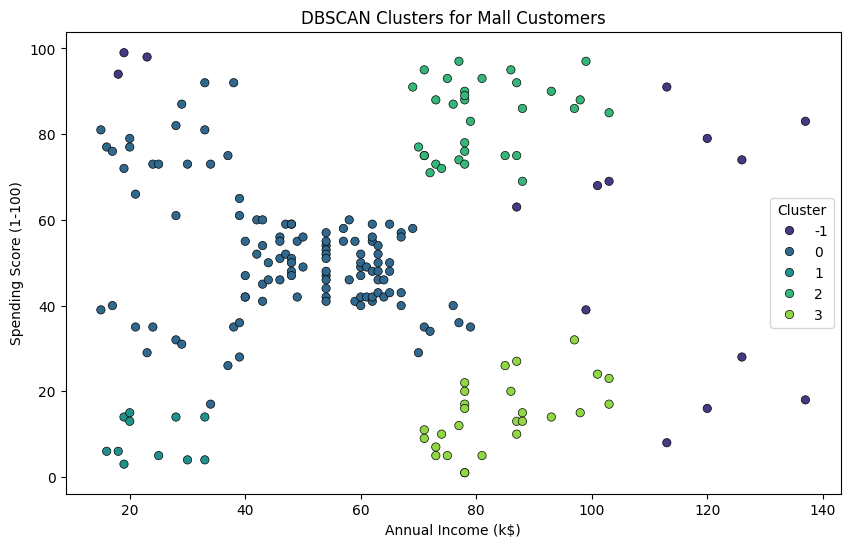


Cluster Distribution:
Cluster
 0    115
 2     32
 3     27
-1     15
 1     11
Name: count, dtype: int64

Cluster Analysis (Mean Features):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
-1                96.133333               61.800000
 0                48.304348               51.730435
 1                23.727273                8.909091
 2                80.875000               83.625000
 3                83.925926               14.444444


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/Mall_Customers.csv')

# Data Cleaning
df.drop('CustomerID', axis=1, inplace=True)
df['Genre'] = df['Genre'].astype('category').cat.codes  # Convert categorical to numerical

# Feature Selection and Scaling
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN Parameter Tuning
eps_values = np.arange(0.2, 1.2, 0.2)  # Range for epsilon
min_samples_values = range(3, 12, 2)  # Range for min_samples

best_silhouette = -1
best_eps = None
best_min_samples = None
best_cluster_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)

        unique_labels = set(cluster_labels)

        # Ensure we have at least two clusters (excluding noise, -1)
        if len(unique_labels) > 2 and -1 in unique_labels:
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_cluster_labels = cluster_labels

# Apply Best DBSCAN Model
if best_eps is not None:
    print(f"Best Parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette={best_silhouette:.4f}")

    df['Cluster'] = best_cluster_labels

    # Visualizing Clusters with Noise
    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("viridis", len(set(best_cluster_labels)))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                    hue=df['Cluster'], data=df, palette=palette, edgecolor='black')

    plt.title('DBSCAN Clusters for Mall Customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()

    # Cluster Statistics
    print("\nCluster Distribution:")
    print(df['Cluster'].value_counts())

    print("\nCluster Analysis (Mean Features):")
    print(df.groupby('Cluster')[features].mean())

else:
    print("No suitable clustering found. Try adjusting hyperparameter ranges.")
